In [1]:
import importlib
import os
import sys
import numpy as np

import plot_API
import plot_lib
importlib.reload(plot_API)
importlib.reload(plot_lib)

<module 'plot_lib' from '/home/smg/wang/WORK/WORK/CODE/git_local/team/project-NN-Pytorch-scripts/tutorials/plot_tools/plot_lib.py'>

### plot hist

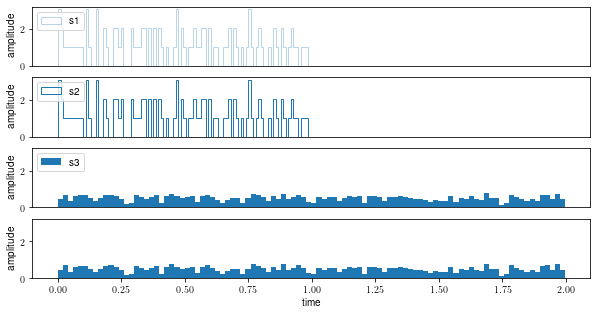

In [31]:
data = np.random.rand(100)
data2 = np.random.rand(1000)*2
data = [data, data, data2, data2]

config = {"xlabel": "time",
          "ylabel": "amplitude",
          #"xlim": (0, 100),
          #"ylim": (0, 1),
          "sharey": True,
          "sharex": True,
          #"xticks": [10, 50, 80],
          #"xticklabels": ["101", "501", "801"],
          #"yticks": [0.2, 0.5, 1.0],
          #"yticklabels": ["0.2", "0.5", "1.0"],          
          "sub1": [{"legend": {"labels": ["s1"], "loc":2}},
                   {"legend": {"labels": ["s2"], "loc":2}},
                   {"legend": {"labels": ["s3"], "loc":2}}],
          "sub2": [{"plot_hist": {"bins": 100, "density": True, "histtype": "step", "alpha":0.3}},
                   {"plot_hist": {"bins": 100, "density": True, "histtype": "step"}},
                   {"plot_hist": {"bins": 100, "density": True}},
                   {"plot_hist": {"bins": 100, "density": True}}]
         }

fig, axis = plot_API.plot_API(data, plot_lib.plot_hist, 'v', config)

### plot imshow

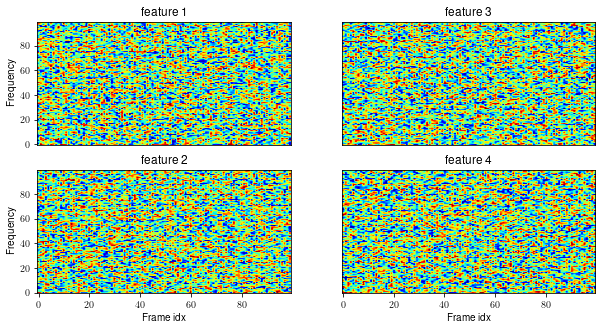

In [32]:
data = [np.random.rand(100, 100), np.random.rand(100, 100), np.random.rand(100, 100), np.random.rand(100, 100)]

config = {"xlabel": "Frame idx",
          "ylabel": "Frequency",
          "sharey": True,
          "sharex": True,
          "subtitle": [{"title": "feature 1"},
                       {"title": "feature 2"},
                       {"title": "feature 3"},
                       {"title": "feature 4"}]
         }

fig, axis = plot_API.plot_API(data, plot_lib.plot_imshow, 'grid', config)

### plot scatter

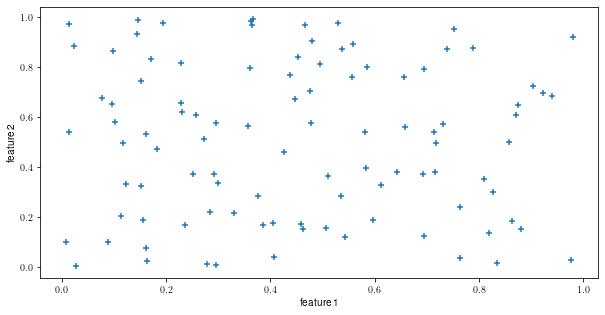

In [52]:
data = np.random.rand(100, 2) 

config = {"xlabel": "feature 1",
          "ylabel": "feature 2",
          "plot_scatter": {"marker": '+'}
         }

fig, axis = plot_API.plot_API(data, plot_lib.plot_scatter, 'single', config)

### plot DET curves

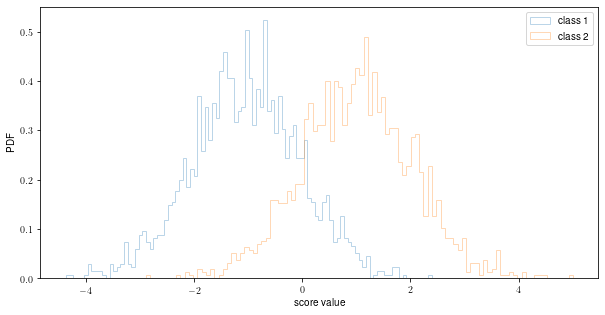

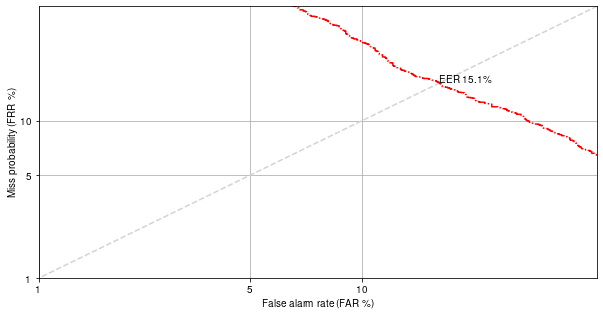

In [16]:
# create distributions of for two scores

score_class_1 = np.random.standard_normal(2000) - 1
score_class_2 = np.random.standard_normal(2000) + 1

# plot score histogram
config = {"xlabel": "score value",
          "ylabel": "PDF",
          "plot_hist": {"bins": 100, "density": True, "histtype": "step", "alpha":0.3},
          "legend": {'labels': ['class 1', 'class 2']}}

fig, axis = plot_API.plot_API([score_class_1, score_class_2], plot_lib.plot_hist, 'single', config)

# compute FAR and FRR
# We need this function from https://www.asvspoof.org/asvspoof2019/tDCF_python_v1.zip / eval_metrics.py
#  it is also available in ../../sandbox/eval_asvspoof.py
def compute_det_curve(target_scores, nontarget_scores):
    """ frr, far, thresholds = compute_det_curve(target_scores, nontarget_scores)
    input
    -----
      target_scores: np.array, scores of target class
      nontarget_scores: np.array, scores of non-target class
      
    output
    ------
      frr: np.array, false rejection rate for each operating point
      far: np.array, false acceptable rate for each operating point
      thresholds: np.array, operating points
    """
    n_scores = target_scores.size + nontarget_scores.size
    all_scores = np.concatenate((target_scores, nontarget_scores))
    labels = np.concatenate((np.ones(target_scores.size), 
                             np.zeros(nontarget_scores.size)))

    # Sort labels based on scores
    indices = np.argsort(all_scores, kind='mergesort')
    labels = labels[indices]

    # Compute false rejection and false acceptance rates
    tar_trial_sums = np.cumsum(labels)
    nontarget_trial_sums = (nontarget_scores.size - 
                            (np.arange(1, n_scores + 1) - tar_trial_sums))

    frr = np.concatenate((np.atleast_1d(0), tar_trial_sums/target_scores.size))
    # false rejection rates
    far = np.concatenate((np.atleast_1d(1), 
                          nontarget_trial_sums / nontarget_scores.size))  
    # false acceptance rates
    thresholds = np.concatenate((np.atleast_1d(all_scores[indices[0]] - 0.001), 
                                 all_scores[indices]))  
    # Thresholds are the sorted scores
    return frr, far, thresholds

# compute frr and far
frr, far, thresholds = compute_det_curve(score_class_2, score_class_1)

config = {"xticks": [0.01, 0.05, 0.1], "yticks": [0.01, 0.05, 0.1],
          "xlim": (0.01, 0.3), "ylim": (0.01, 0.3),
          "plot_det": {"linestyle": "-.", "color":"r"}, "eer": True}

fig, axis = plot_API.plot_API([[frr, far]], plot_lib.plot_det, 'single', config)